In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/processed/reviews.csv")
df.head()


,app_id,recommended,review_text,timestamp_created,playtime_at_review,steam_purchase,received_for_free,written_during_early_access,votes_up,votes_funny,weighted_vote_score
0,570,False,"Gameplay is horrible, the game is dead",1766533221,181427.0,True,False,False,0,0,0.5
1,570,True,These days I like the endless custom games tha...,1766429760,1094780.0,True,True,False,0,0,0.5
2,570,False,The only people who play this game anymore are...,1766380672,230610.0,True,False,False,0,0,0.5
3,570,False,full of people that don't know what team play is,1766262674,129774.0,True,False,False,0,0,0.5
4,570,True,Just play til you understand.,1766100153,364520.0,True,False,False,0,0,0.5


In [5]:
print("Number of reviews:", len(df))
print("Number of games:", df["app_id"].nunique())

df["recommended"].value_counts(normalize=True)


Number of reviews: 4453
Number of games: 5


recommended
True     0.848192
False    0.151808
Name: proportion, dtype: float64

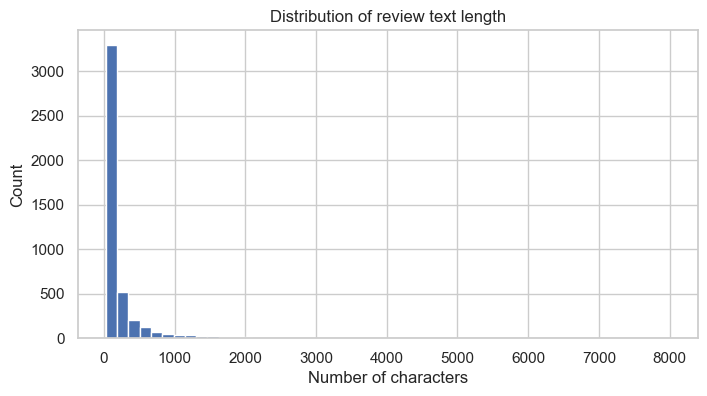

In [6]:
df["text_length"] = df["review_text"].str.len()

plt.figure(figsize=(8, 4))
plt.hist(df["text_length"], bins=50)
plt.title("Distribution of review text length")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()


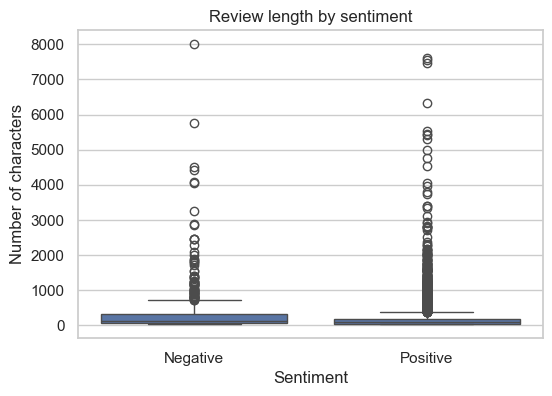

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="recommended",
    y="text_length",
    data=df
)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Review length by sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of characters")
plt.show()


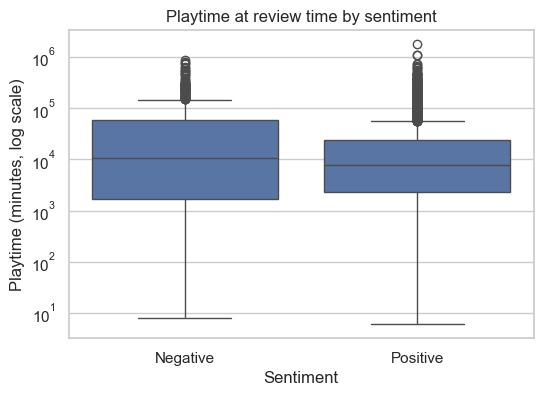

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="recommended",
    y="playtime_at_review",
    data=df
)
plt.yscale("log")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Playtime at review time by sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Playtime (minutes, log scale)")
plt.show()


Positive reviews are significantly more frequent than negative ones and tend to be longer on average. Review length therefore carries a strong sentiment signal, which explains the good performance of simple text-based classifiers.


In [3]:
import os
print("CWD:", os.getcwd())
print("Files here:", os.listdir(".")[:20])


CWD: c:\Users\mathi\Desktop\PROJECTS\steam-project\notebooks
Files here: ['01_eda.ipynb', '02_modeling.ipynb', '03_finetune_lora_colab.ipynb']


In [4]:
import os
os.chdir(r"C:\Users\mathi\Desktop\PROJECTS\steam-project")
print(os.getcwd())


C:\Users\mathi\Desktop\PROJECTS\steam-project


In [5]:
import pandas as pd

df = pd.read_csv("reports/prompt_batch.csv", engine="python")
print("Total rows:", len(df))
print(df["method"].value_counts(dropna=False))
print("Engineered rows:", (df["method"] == "engineered").sum())


Total rows: 8844
method
naive         4422
engineered    4422
Name: count, dtype: int64
Engineered rows: 4422
